In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib.image as mpimg

import numpy as np
import matplotlib

import numpy as np
import os
import json
from tqdm import tqdm 
import skvideo.io

path_data_dirname = "/media/giancos/Football/dataset_crop224/"

labels = ["background", "card", "substitution", "goal"]



def ShowResults(gamePath, savePath):
    
    print(os.path.join(path_data_dirname, gamePath))

    with open(os.path.join(path_data_dirname, gamePath, "Labels.json")) as file :
        JsonFile = json.loads(file.read())

        print(len(JsonFile['annotations']))




        fig, axs = plt.subplots(1,len(JsonFile['annotations']),num=None, 
                figsize=(2*len(JsonFile['annotations']), 3), 
                dpi=100, 
                facecolor='w',
                edgecolor='k',
                               sharey=True)


        half = 2
        for i, myEvent in enumerate(JsonFile['annotations']):
            if (half == 2 and int(myEvent['gameTime'][:1]) == 1):
                videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "1.mkv"),  backend='ffmpeg')
                index_frame = 0
            elif (half == 1 and int(myEvent['gameTime'][:1]) == 2):
                videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "2.mkv"),  backend='ffmpeg')
                index_frame = 0


            half = int(myEvent['gameTime'][:1])
            second = int(myEvent['gameTime'][-2:])
            minute = int(myEvent['gameTime'][-5:-3])

            t=minute*60+second     

            
            
            
            
            
            
            
            for win in [60,50,40,30,20,10,5]:
            

                if (half == 1):
                    predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_"+str(win)+"_Half_1.npy"))
    #                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_1.npy"))
                elif (half == 2):
                    predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_"+str(win)+"_Half_2.npy"))
    #                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_2.npy"))


                frame_fileName = os.path.join(path_data_dirname, gamePath,
                                              "Frame_%1d_%02d_%02d_" % (half, minute, second) +  myEvent['label'] + ".png")
    #             print(frame_fileName)
                if (os.path.exists(frame_fileName)):
    #                 print("exist")                
                    arr_img = plt.imread(frame_fileName)

                else:
                    print("NOT exist")
                    continue


                if "soccer" in myEvent['label']: current_index_label = 3
                elif "substitution" in myEvent['label']: current_index_label = 2
                elif "card" in myEvent['label']: current_index_label = 1
                else: current_index_label = 0





                ax = axs[i]
                ax.set_axisbelow(True)
                ax.xaxis.grid(color='gray', linestyle='dashed')
                ax.yaxis.grid(color='gray', linestyle='dashed')


    #             ax.plot( [t,t], 
    #                     [0,1],
    #                     linewidth=4.0, color="k")

                labels= ["background", "card", "substitution", "goal"]
                c=[[0,0,0], [0,0,1], [0,1,0], [1,0,0]]

    #             for i_label in [1,2,3]:
                for i_label in [current_index_label]:
                    i_init = np.max([t-60, 0]) 
                    i_end = np.min([t+60, len(predictions[:,i_label])]) 
                    ax.plot(np.arange(i_init,i_end), 
                            predictions[i_init:i_end,i_label],
                            linewidth=1, color=np.concatenate([c[i_label],[(60-win)/60.0]]), label=labels[i_label])



            ax.tick_params(axis='both', which='major', labelsize=20)
            plt.sca(ax)

            off = 40
            time_init = "%1d-%02d:%02d" % (half, (t-off)//60, (t-off)%60)
            time_end = "%1d-%02d:%02d" % (half, (t+off)//60, (t+off)%60)
            time_t = "%1d-%02d:%02d" % (half, t//60, t%60)

            locs, labels = plt.xticks([t-off, t, t+off], 
                                      [time_init, time_t, time_end], 
                                      rotation=45)





            from matplotlib.patches import Circle
            from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                              AnnotationBbox)
            from matplotlib.cbook import get_sample_data


            imagebox = OffsetImage(arr_img, zoom=0.4)
            imagebox.image.axes = ax



                
            linestyle='--'

            ab = AnnotationBbox(imagebox, (t,1),
                             xybox=(-0., 70.),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0.3,
                            bboxprops=dict( linestyle=linestyle, linewidth=3),
                            arrowprops=dict(arrowstyle="->", color=c[current_index_label], linewidth=3))

            ax.add_artist(ab)


            ax.set_ylim(0, 3)
            plt.sca(ax)
            plt.yticks([0,1])


            
        plt.show()
        
        path_figure = os.path.join(path_data_dirname, gamePath, "QualitativeResults.png")
        fig.savefig(path_figure, bbox_inches='tight')

In [ ]:
ShowResults(gamePath = np.load(os.path.join(path_data_dirname, "listgame_train_300.npy"))[0],
            savePath = "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Train.png")




ImagePath = ["/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Train.png",
       "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Valid.png",
       "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Test.png"]


/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley
10


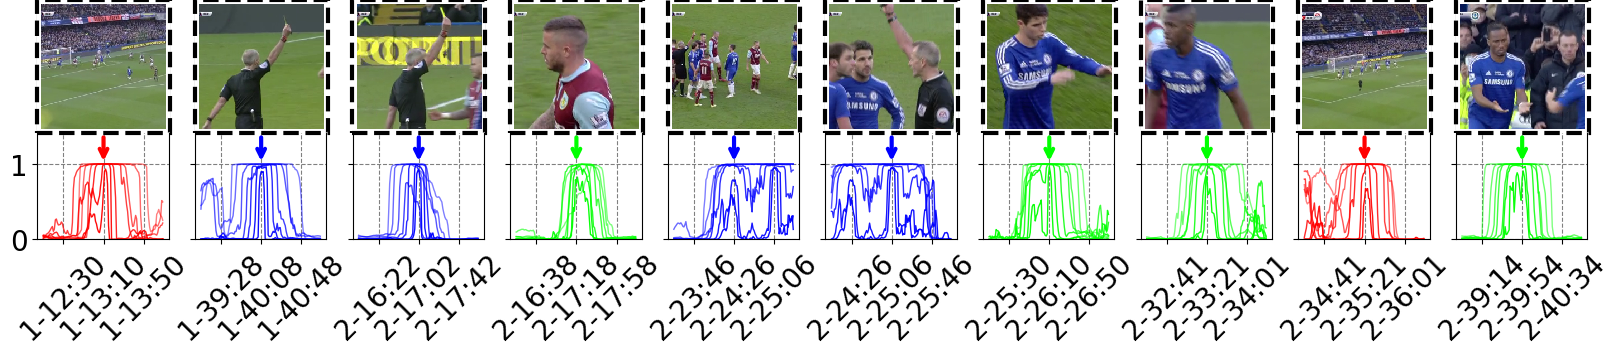

/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-04-11 - 19-30 Burnley 0 - 1 Arsenal
6


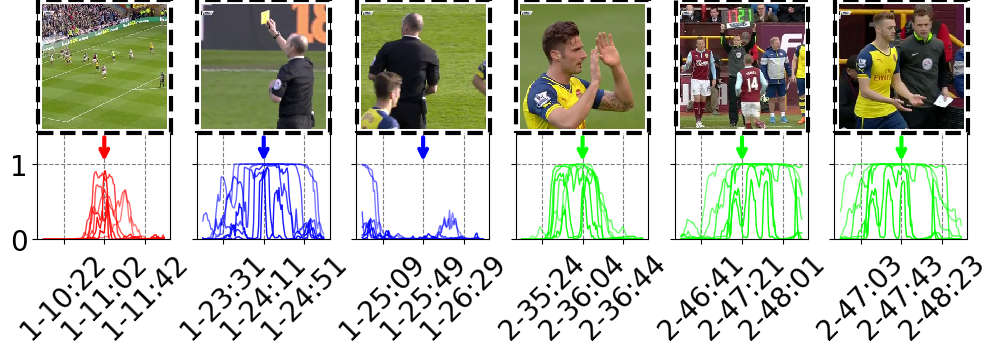

/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal
9


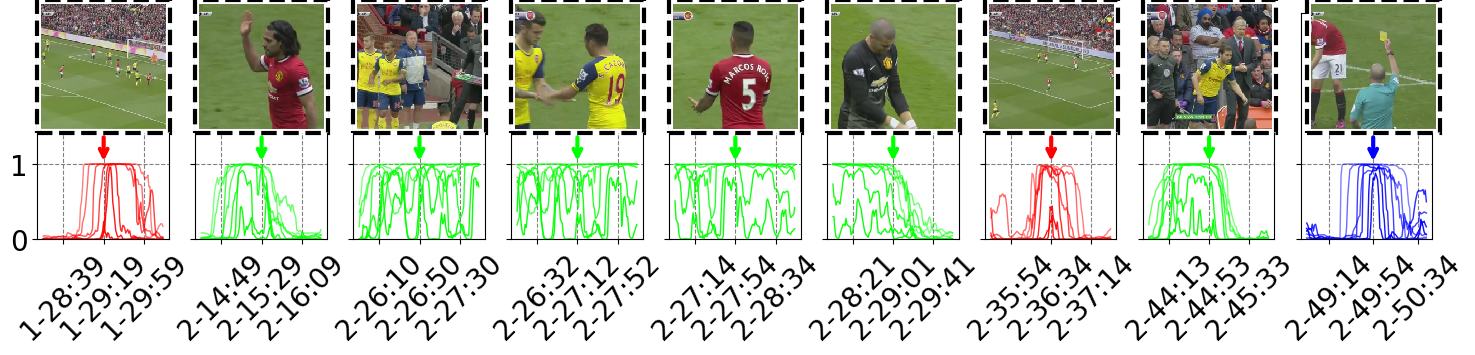

In [27]:
# gamePath = "england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/"
# gamePath = "england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal/"
# gamePath = "england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal/"
# for gamePath in np.load(os.path.join(path_data_dirname, "listgame_test_100.npy")):




ImagePath = ["/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Train.png",
       "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Valid.png",
       "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Supplementary/QualitativeResults_Test.png"]








# for gamePath in np.load(os.path.join(path_data_dirname, "listgame.npy")):
for gamePath in [np.load(os.path.join(path_data_dirname, "listgame_train_300.npy"))[0],
                 np.load(os.path.join(path_data_dirname, "listgame_valid_100.npy"))[0],
                 np.load(os.path.join(path_data_dirname, "listgame_test_100.npy"))[0]]:


    print(os.path.join(path_data_dirname, gamePath))

    with open(os.path.join(path_data_dirname, gamePath, "Labels.json")) as file :
        JsonFile = json.loads(file.read())

        print(len(JsonFile['annotations']))




        fig, axs = plt.subplots(1,len(JsonFile['annotations']),num=None, 
                figsize=(2*len(JsonFile['annotations']), 3), 
                dpi=100, 
                facecolor='w',
                edgecolor='k',
                               sharey=True)


        half = 2
        for i, myEvent in enumerate(JsonFile['annotations']):
            if (half == 2 and int(myEvent['gameTime'][:1]) == 1):
                videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "1.mkv"),  backend='ffmpeg')
                index_frame = 0
            elif (half == 1 and int(myEvent['gameTime'][:1]) == 2):
                videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "2.mkv"),  backend='ffmpeg')
                index_frame = 0


            half = int(myEvent['gameTime'][:1])
            second = int(myEvent['gameTime'][-2:])
            minute = int(myEvent['gameTime'][-5:-3])

            t=minute*60+second     

            
            
            
            
            
            
            
            for win in [60,50,40,30,20,10,5]:
            

                if (half == 1):
                    predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_"+str(win)+"_Half_1.npy"))
    #                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_1.npy"))
                elif (half == 2):
                    predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_"+str(win)+"_Half_2.npy"))
    #                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_2.npy"))


                frame_fileName = os.path.join(path_data_dirname, gamePath,
                                              "Frame_%1d_%02d_%02d_" % (half, minute, second) +  myEvent['label'] + ".png")
    #             print(frame_fileName)
                if (os.path.exists(frame_fileName)):
    #                 print("exist")                
                    arr_img = plt.imread(frame_fileName)

                else:
                    print("NOT exist")
                    continue


                if "soccer" in myEvent['label']: current_index_label = 3
                elif "substitution" in myEvent['label']: current_index_label = 2
                elif "card" in myEvent['label']: current_index_label = 1
                else: current_index_label = 0





                ax = axs[i]
                ax.set_axisbelow(True)
                ax.xaxis.grid(color='gray', linestyle='dashed')
                ax.yaxis.grid(color='gray', linestyle='dashed')


    #             ax.plot( [t,t], 
    #                     [0,1],
    #                     linewidth=4.0, color="k")

                labels= ["background", "card", "substitution", "goal"]
                c=[[0,0,0], [0,0,1], [0,1,0], [1,0,0]]

    #             for i_label in [1,2,3]:
                for i_label in [current_index_label]:
                    i_init = np.max([t-60, 0]) 
                    i_end = np.min([t+60, len(predictions[:,i_label])]) 
                    ax.plot(np.arange(i_init,i_end), 
                            predictions[i_init:i_end,i_label],
                            linewidth=1, color=np.concatenate([c[i_label],[(60-win+60)/120.0]]), label=labels[i_label])



            ax.tick_params(axis='both', which='major', labelsize=20)
            plt.sca(ax)

            off = 40
            time_init = "%1d-%02d:%02d" % (half, (t-off)//60, (t-off)%60)
            time_end = "%1d-%02d:%02d" % (half, (t+off)//60, (t+off)%60)
            time_t = "%1d-%02d:%02d" % (half, t//60, t%60)

            locs, labels = plt.xticks([t-off, t, t+off], 
                                      [time_init, time_t, time_end], 
                                      rotation=45)





            from matplotlib.patches import Circle
            from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                              AnnotationBbox)
            from matplotlib.cbook import get_sample_data


            imagebox = OffsetImage(arr_img, zoom=0.4)
            imagebox.image.axes = ax



                
            linestyle='--'

            ab = AnnotationBbox(imagebox, (t,1),
                             xybox=(-0., 70.),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0.3,
                            bboxprops=dict( linestyle=linestyle, linewidth=3),
                            arrowprops=dict(arrowstyle="->", color=c[current_index_label], linewidth=3))

            ax.add_artist(ab)


            ax.set_ylim(0, 3)
            plt.sca(ax)
            plt.yticks([0,1])


            
            
#         box = ax.get_position()
#         ax.set_position([box.x0, box.y0 + box.height * 0.1,
#         box.width, box.height * 0.9])
#         ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#                   fancybox=True, shadow=True, ncol=5)

#         from matplotlib.font_manager import FontProperties

#         fontP = FontProperties()
#         fontP.set_size('small')
#         legend([plot1], "title", prop=fontP)

        plt.show()

#         path_figure = os.path.join(path_data_dirname, gamePath, "QualitativeResults.png")
#         fig.savefig(path_figure, bbox_inches='tight')

In [23]:
# Red in Goal, Blue is card, Green is substitution

print(np.array(c[i_label]))
print(np.array(win/60.0))
np.concatenate([c[i_label], [win/60.0]])

[1 0 0]
1.0


array([ 1.,  0.,  0.,  1.])

In [ ]:
)